#Runtime

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00
time: 292 µs (started: 2024-04-04 15:20:12 +00:00)


#Pre-processing data

##Load Dataset

In [ ]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 105MB/s]
time: 15 s (started: 2024-04-04 15:20:27 +00:00)


In [ ]:
!unzip data_ws.zip

Archive:  data_ws.zip
replace data_ws/ws_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
time: 2min 23s (started: 2024-04-04 15:20:42 +00:00)


(240, 426, 3)


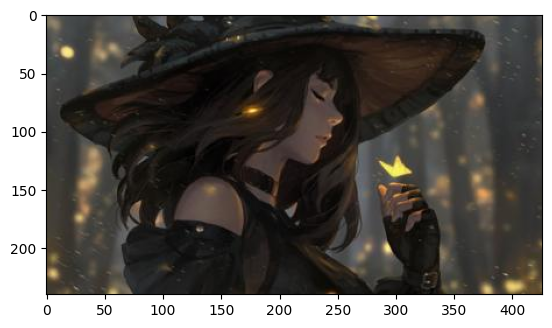

time: 291 ms (started: 2024-04-04 15:23:06 +00:00)


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)
img = None

##Splitting dataset to train, test and val

In [ ]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
# random.shuffle(all_images)
all_images_shuf = all_images
random.shuffle(all_images_shuf)

# Split paths
train_data_ws = all_images_shuf[:967]
remaining_data_ws = all_images_shuf[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.
time: 6.96 ms (started: 2024-04-04 15:23:07 +00:00)


#Model Implementation

###Define models

In [ ]:
import tensorflow as tf
from keras.applications import VGG19, ResNet50, ResNet50V2, InceptionV3, InceptionResNetV2, Xception
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

time: 2.79 s (started: 2024-04-04 15:23:07 +00:00)


A custom CNN model

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

def custom_cnn_model():
    # Define the Convolutional Autoencoder architecture
    input_img = Input(shape=(240, 426, 3))  # Input shape should match the image dimensions
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # This is the encoded representation of the input

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # This is the reconstructed input
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

time: 1.3 ms (started: 2024-04-04 15:23:09 +00:00)


In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)
inceptionv3 = InceptionV3(weights='imagenet', include_top=False)
inceptionresnetv2 = InceptionResNetV2(weights='imagenet', include_top=False)
xception = Xception(weights='imagenet', include_top=False)
customCNN = custom_cnn_model()

83683744/83683744 [==============================] - 0s 0us/step
time: 18.8 s (started: 2024-04-04 15:23:09 +00:00)


In [ ]:
vgg19_name = 'vgg19'
resnet50_name = 'resnet50'
inceptionv3_name = 'inceptionv3'
inceptionresnetv2_name = 'inceptionresnetv2'
xception_name = 'xception'
customCNN_name = 'customCNN'

time: 585 µs (started: 2024-04-04 15:23:32 +00:00)


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input
from keras.applications.inception_resnet_v2 import preprocess_input as inceptionresnetv2_preprocess_input
from keras.applications.xception import preprocess_input as xception_preprocess_input

time: 917 µs (started: 2024-04-04 15:28:21 +00:00)


In [ ]:
def customCNN_preprocess_input(input_array):
    input_array = input_array / 255.0
    return input_array

time: 401 µs (started: 2024-04-04 15:28:24 +00:00)


###Continue

In [ ]:
import numpy as np

time: 386 µs (started: 2024-04-04 15:28:29 +00:00)


In [ ]:
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(240, 426))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

train_images = load_images(all_images)

time: 2.38 s (started: 2024-04-04 15:28:30 +00:00)


###Visualize clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

time: 1.29 s (started: 2024-04-04 15:28:33 +00:00)


In [ ]:
n_clusters = 19
n_components = 2
random_state = 42

time: 584 µs (started: 2024-04-04 15:28:37 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


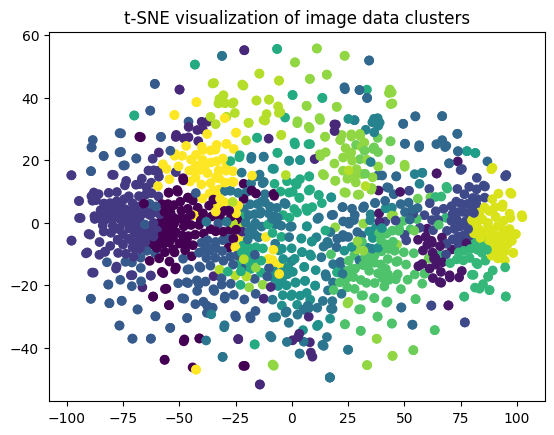

time: 10min 6s (started: 2024-04-04 08:10:59 +00:00)


In [ ]:
# Flatten the images for clustering
flattened_images = train_images.reshape(train_images.shape[0], -1)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)  # Change the number of clusters as needed
kmeans.fit(flattened_images)

# Perform t-SNE dimensionality reduction for visualization
tsne = TSNE(n_components=n_components, random_state=random_state)
reduced_data = tsne.fit_transform(flattened_images)

# Plot the data points in the reduced dimension space
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.title('t-SNE visualization of image data clusters')
plt.show()


<ipython-input-19-0a195f04b176>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', n_clusters)


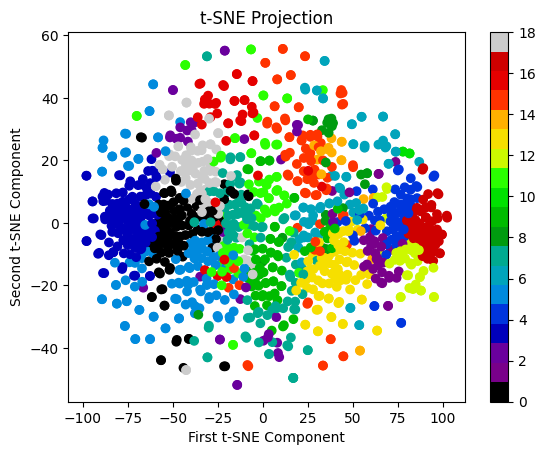

time: 493 ms (started: 2024-04-04 08:24:51 +00:00)


In [ ]:
cmap = plt.cm.get_cmap('nipy_spectral', n_clusters)

# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap=cmap)
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.title("t-SNE Projection")
plt.colorbar()
plt.show()

In [ ]:
n_clusters = None
flattened_images = None
kmeans = None
tsne = None
reduced_data = None

time: 681 µs (started: 2024-04-04 08:25:03 +00:00)


###FUNCTIONS

In [ ]:
def preprocess_input(input_array, model_name):
    if model_name == 'vgg19':
        return vgg19_preprocess_input(input_array)

    elif model_name == 'resnet50':
        return resnet50_preprocess_input(input_array)

    elif model_name == 'inceptionv3':
        return inceptionv3_preprocess_input(input_array)

    elif model_name == 'inceptionresnetv2':
        return inceptionresnetv2_preprocess_input(input_array)

    elif model_name == 'xception':
        return xception_preprocess_input(input_array)

    elif model_name == 'customCNN':
        return customCNN_preprocess_input(input_array)

    else: return

time: 711 µs (started: 2024-04-04 15:28:42 +00:00)


In [ ]:
def extract_features(input_array, model_name):
    if model_name == 'vgg19':
        return vgg19.predict(input_array)

    elif model_name == 'resnet50':
        return resnet50.predict(input_array)

    elif model_name == 'inceptionv3':
        return inceptionv3.predict(input_array)

    elif model_name == 'inceptionresnetv2':
        return inceptionresnetv2.predict(input_array)

    elif model_name == 'xception':
        return xception.predict(input_array)

    elif model_name == 'customCNN':
        return customCNN.predict(input_array)

    else: return

time: 720 µs (started: 2024-04-04 15:28:43 +00:00)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from skimage.metrics import structural_similarity as ssim
from scipy.stats import wasserstein_distance
import matplotlib.image as mpimg

time: 60.3 ms (started: 2024-04-04 15:28:46 +00:00)


In [ ]:
# def compute_histogram(image):
#     hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
#     hist = cv2.normalize(hist, hist).flatten()
#     return hist

time: 326 µs (started: 2024-04-04 12:02:16 +00:00)


In [ ]:
def compute_ssim(image1, image2):
    # Convert the images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    # Compute SSIM between two images
    return ssim(image1_gray, image2_gray)

time: 612 µs (started: 2024-04-04 15:33:45 +00:00)


In [ ]:
def compute_histogram_similarity(image1, image2):
    # Compute the color histograms of the two images
    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

    # Normalize the histograms
    cv2.normalize(hist1, hist1)
    cv2.normalize(hist2, hist2)

    # Compute the correlation between the two histograms
    correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

    return correlation

time: 807 µs (started: 2024-04-04 15:33:46 +00:00)


In [ ]:
def visualize_images(input_image_path, image_paths, similarity_scores):
    # Load the input image
    input_image = cv2.imread(input_image_path)

    # Initialize the figure
    fig = plt.figure(figsize=(20, 10))

    # Display input image
    ax = fig.add_subplot(1, 6, 1)
    img = mpimg.imread(input_image_path)
    ax.imshow(img)
    ax.set_title("Input Image")

    # Display histogram of input image
    ax = fig.add_subplot(2, 6, 1)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([input_image],[i],None,[256],[0,256])
        ax.plot(histr,color = col)
    ax.set_title("Histogram of Input Image")

    # Display similar images
    for i in range(len(image_paths)):
        if similarity_scores[i] > 0.5:
            ax = fig.add_subplot(1, 6, i+2)
            img_path = image_paths[i]
            img = mpimg.imread(img_path)
            ax.imshow(img)

            # Load the similar image
            similar_image = cv2.imread(img_path)

            # Compute SSIM and histogram similarity
            ssim_score = compute_ssim(input_image, similar_image)
            hist_similarity = compute_histogram_similarity(input_image, similar_image)

            image_name = os.path.basename(img_path)
            ax.set_title(f"Similar Image {i+1}\n Image Name: {image_name}\n Similarity: {similarity_scores[i]:.2%}\n SSIM: {ssim_score:.2f}\n Hist Similarity: {hist_similarity:.2f}")

            # Display histogram of similar image
            ax = fig.add_subplot(2, 6, i+2)
            color = ('b','g','r')
            for i,col in enumerate(color):
                histr = cv2.calcHist([similar_image],[i],None,[256],[0,256])
                ax.plot(histr,color = col)
            ax.set_title(f"Histogram of Similar Image {i+1}")

    plt.tight_layout()
    plt.show()


time: 1.75 ms (started: 2024-04-04 15:33:48 +00:00)


In [ ]:
  def image_similarity(input_image_path, model_name):
      # Load and preprocess the input image
      input_image = load_img(input_image_path, target_size=(240, 426))
      input_array = img_to_array(input_image)
      input_array = np.expand_dims(input_array, axis=0)

      # Preprocess the input for the chosen model
      input_preprocessed = preprocess_input(input_array, model_name)

      # Extract features from the input
      input_features = extract_features(input_preprocessed, model_name)

      # Flatten the input features
      input_features_flat = input_features.reshape(input_features.shape[0], -1)

      # Preprocess the training images for the chosen model
      train_images_preprocessed = preprocess_input(train_images, model_name)

      # Extract features from the training images
      train_features = extract_features(train_images_preprocessed, model_name)

      # Flatten the training features
      train_features_flat = train_features.reshape(train_features.shape[0], -1)

      # Compute similarity scores
      similarity_scores = cosine_similarity(input_features_flat, train_features_flat)
      similarity_scores_flat = similarity_scores.flatten()

      # Get indices of images sorted by similarity scores
      sorted_indices = np.argsort(similarity_scores_flat)

      # Get top indices with more than 50% similarity
      top_indices = [i for i in sorted_indices if similarity_scores_flat[i] > 0.5]

      if len(top_indices) == 0:
          print("No major similar images found.")
          return [], []

      # Get top 5 most similar images
      top_5_indices = top_indices[-5:]
      top_5_image_paths = [all_images[i] for i in top_5_indices]
      top_5_similarity_scores = [similarity_scores_flat[i] for i in top_5_indices]

      # Visualize images
      visualize_images(input_image_path, top_5_image_paths, top_5_similarity_scores)

      return top_5_image_paths, top_5_similarity_scores


time: 1.28 ms (started: 2024-04-04 15:34:14 +00:00)


###TESTING

In [ ]:
input_image_path = all_images[9]

time: 469 µs (started: 2024-04-04 15:34:23 +00:00)


38/38 [==============================] - 30s 518ms/step


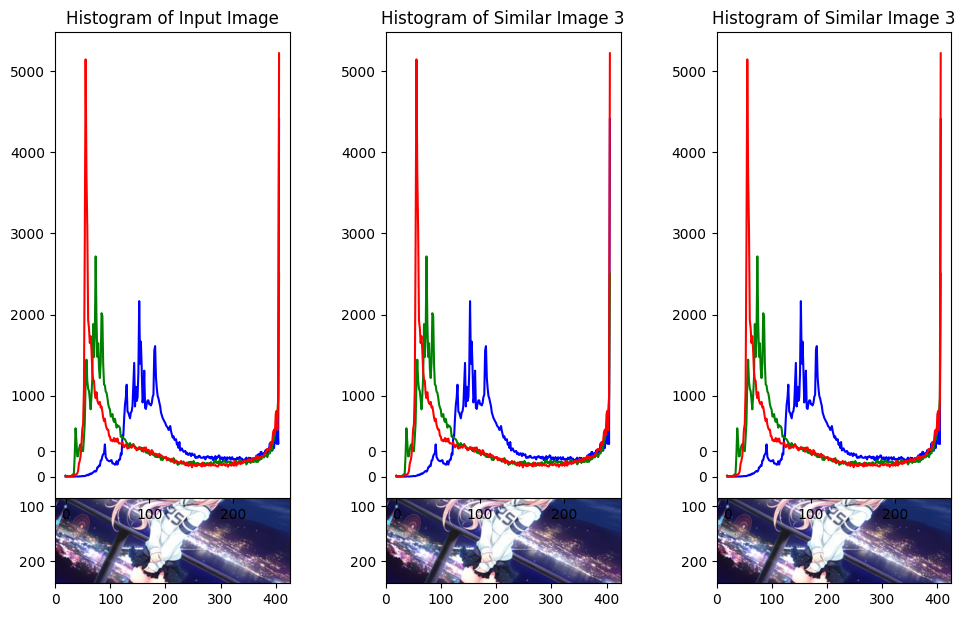

time: 38.2 s (started: 2024-04-04 15:34:26 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, vgg19_name)
top_5_image_paths = None
top_5_similarity_scores = None

In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, resnet50_name)
top_5_image_paths = None
top_5_similarity_scores = None

38/38 [==============================] - 6s 166ms/step
No major similar images found.
time: 14.4 s (started: 2024-04-04 12:23:08 +00:00)


38/38 [==============================] - 13s 212ms/step


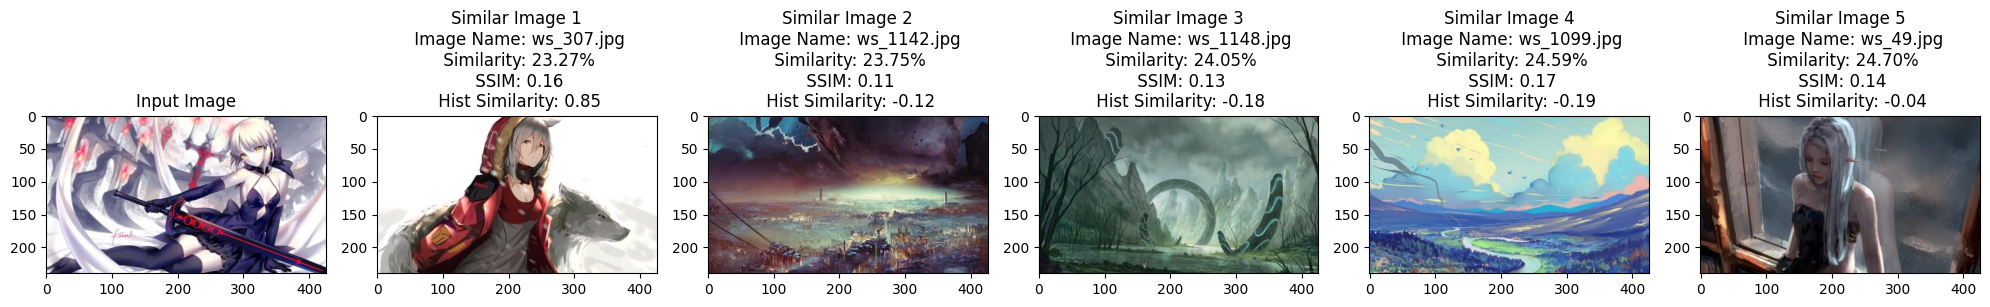

time: 25 s (started: 2024-04-04 12:06:52 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, inceptionv3_name)
top_5_image_paths = None
top_5_similarity_scores = None

38/38 [==============================] - 11s 286ms/step


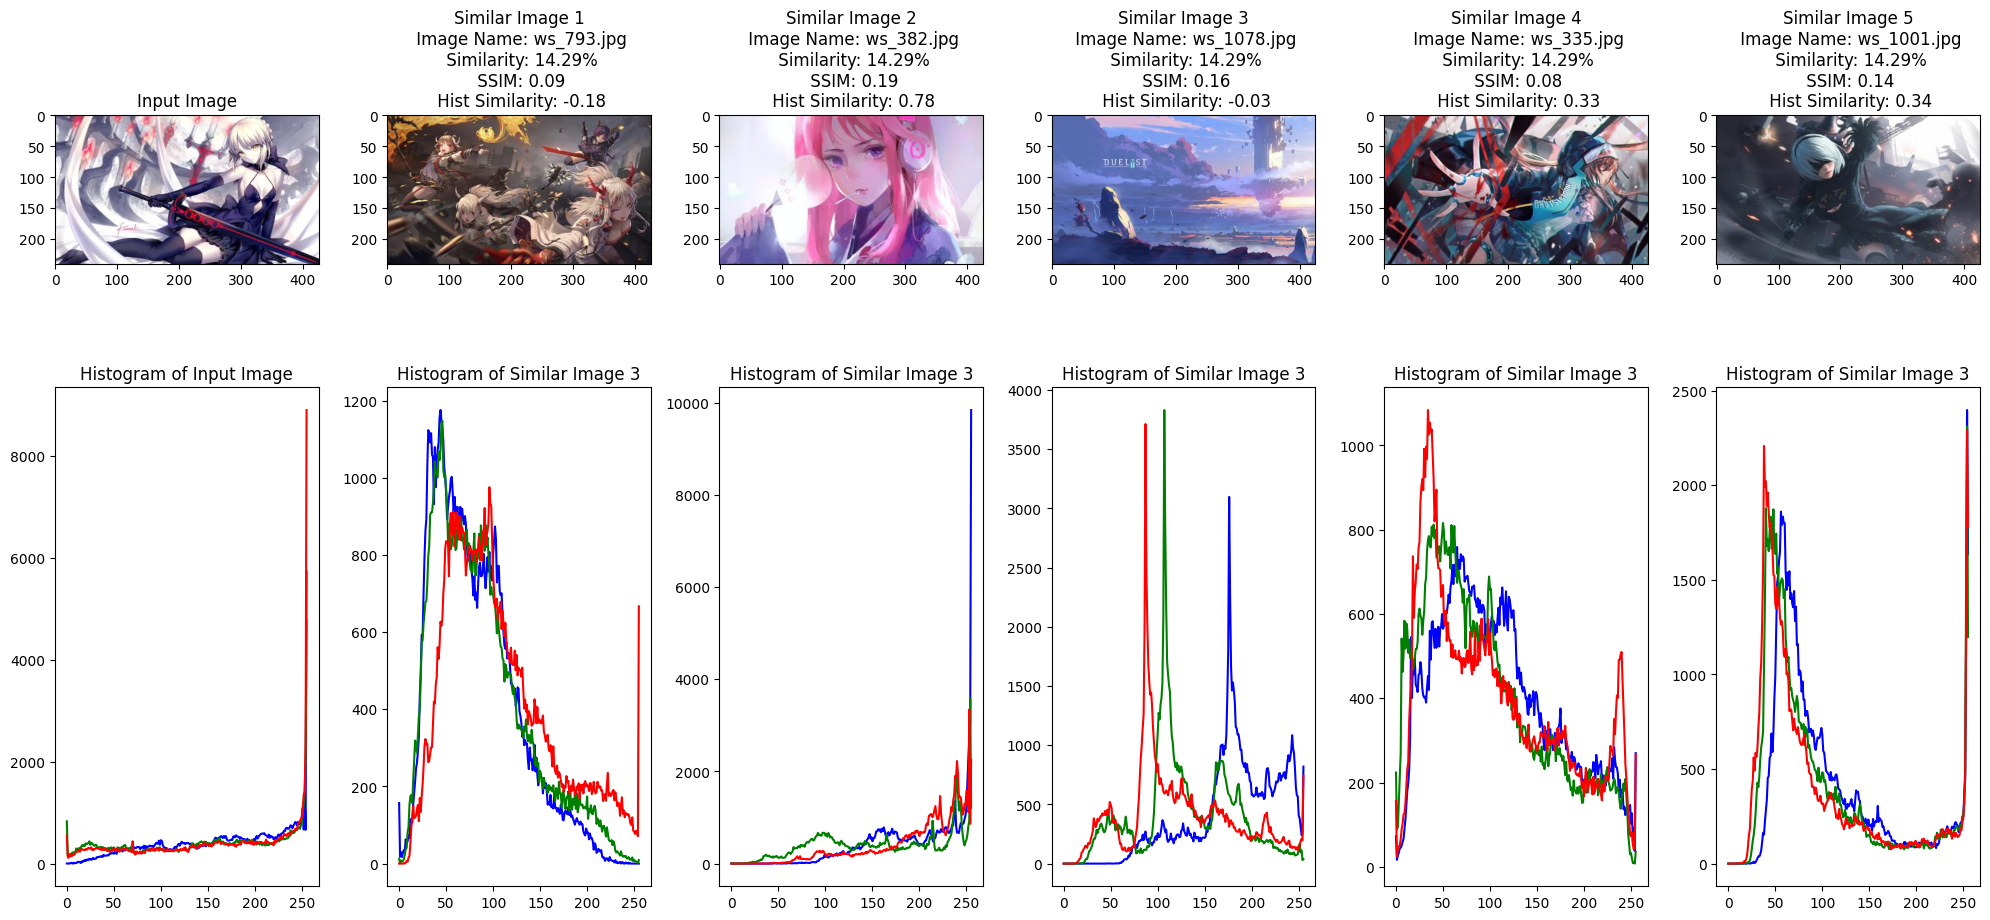

time: 26.9 s (started: 2024-04-04 12:14:23 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, inceptionresnetv2_name)
top_5_image_paths = None
top_5_similarity_scores = None

38/38 [==============================] - 8s 218ms/step


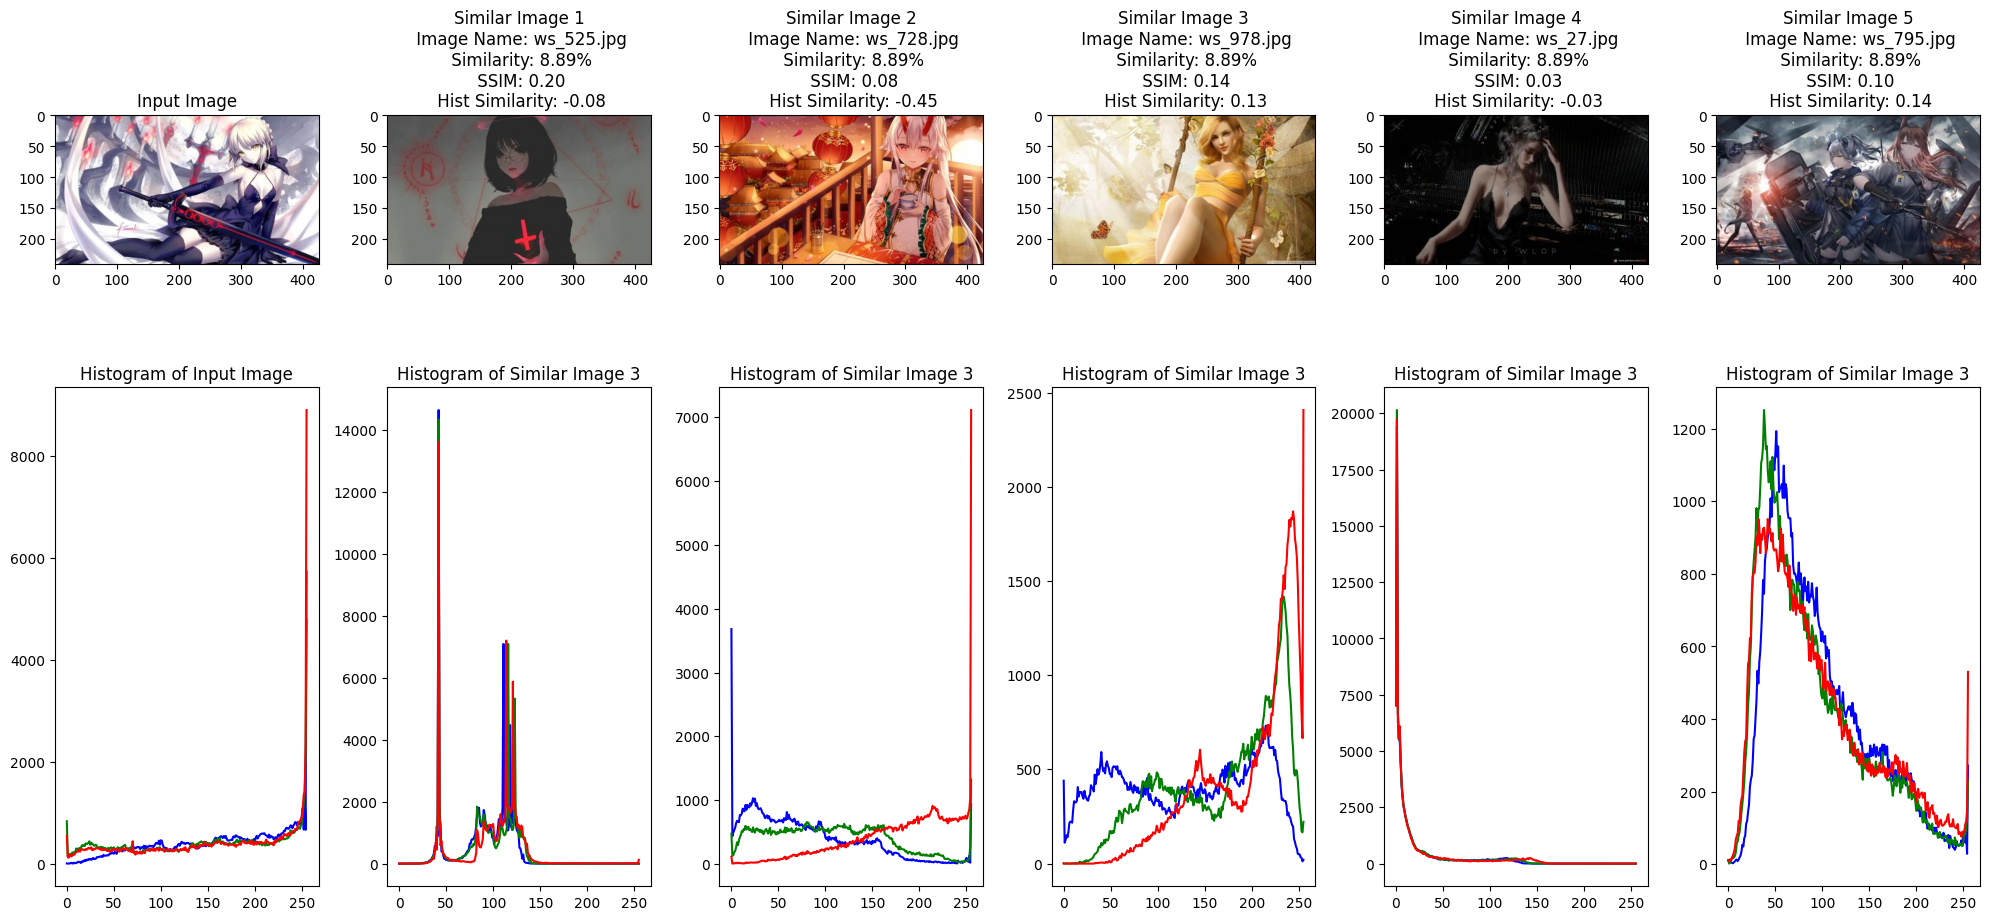

time: 16.8 s (started: 2024-04-04 12:13:52 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, xception_name)
top_5_image_paths = None
top_5_similarity_scores = None

38/38 [==============================] - 4s 69ms/step


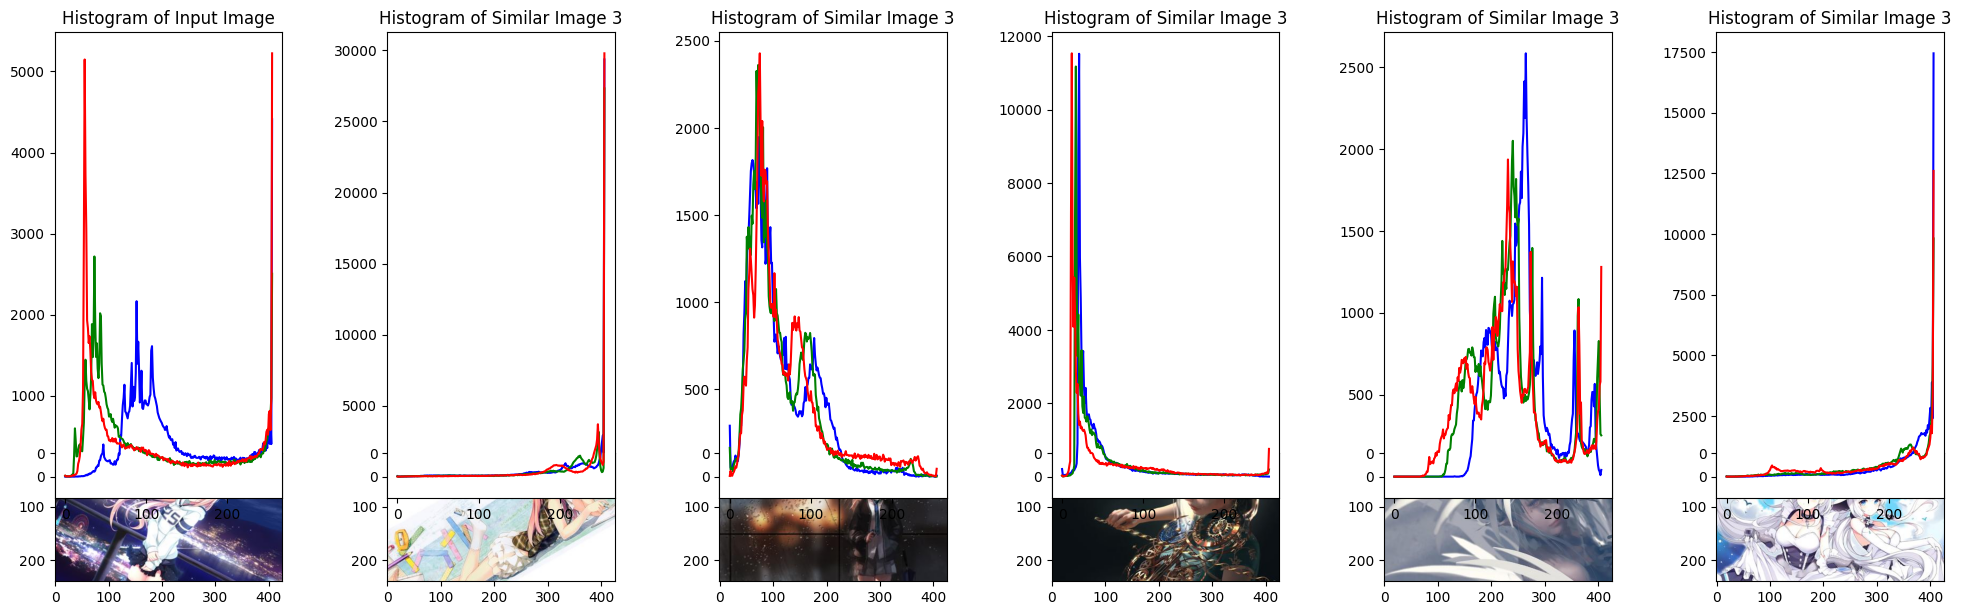

time: 11.6 s (started: 2024-04-04 16:25:19 +00:00)


In [ ]:
top_5_image_paths, top_5_similarity_scores = image_similarity(input_image_path, customCNN_name)
top_5_image_paths = None
top_5_similarity_scores = None

###Continue

###TRAINING with data

###Flatten the features